## Preparación


In [2]:
# Constants
HISTOGRAM_DATA = './data/houses_madrid.csv'
CHLOROPETH_DATA_MAP = './data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
CHLOROPETH_DATA_DENSITY = './data/densityPopulation.csv'
CHLOROPETH_DATA_SAVED_MAP = './assets/chloropeth_map.html'
MARIMEKKO_DATA = './data/01 Presupuestos Generales del Estado Consolidados.xlsx'

## 1. Histograma
### Origen y Autoría

El histograma fue popularizado por Karl Pearson a finales del siglo XIX. Su diseño fue concebido como una herramienta estadística para mostrar la distribución de datos continuos, facilitando así la interpretación visual de patrones como la centralización, la dispersión y la simetría o asimetría en un conjunto de datos.

### Pros y Contras

- **Pros**:
Simplicidad y efectividad: Permite identificar rápidamente la forma de la distribución de datos, como si es simétrica, sesgada a la derecha o izquierda, o si contiene varios picos (modos).
Versatilidad: Es útil en una amplia gama de disciplinas, desde ciencias sociales hasta ingeniería.
Ayuda a detectar outliers: Valores atípicos sobresaldrán en un histograma, lo que facilita su identificación.
- **Contras**:
Dependencia del número de bins: El aspecto del histograma puede variar drásticamente según el número de bins (intervalos) elegido, lo que puede llevar a conclusiones distintas si no se optimiza adecuadamente.
Limitado a datos univariados: Un histograma solo representa una variable a la vez, lo que limita la exploración de relaciones entre múltiples variables.
No es ideal para datos categóricos: Funciona mejor con datos continuos y discretos numéricos, pero no es adecuado para variables puramente categóricas.
### Tipos de Datos que Admite
- **Continuos**: Datos que pueden tomar cualquier valor dentro de un rango, como altura, peso o ingresos.
- **Discretos**: Datos numéricos con valores específicos y no fraccionarios, como el número de hijos en una familia o el número de fallas en un proceso.

### Aplicaciones Típicas
- *Estadística descriptiva*: Análisis de la distribución de frecuencias de variables para estudios poblacionales (un ejemplo típico puede ser ).
- *Ciencias sociales*: Análisis de la distribución de ingresos, edad, calificaciones, etc.
- *Ciencias físicas y naturales*: Frecuencia de eventos, como conteo de partículas en física, distribución de longitudes en botánica, etc.
- *Finanzas*: Análisis de rendimientos de activos, volatilidad de precios, distribuciones de gasto, etc.

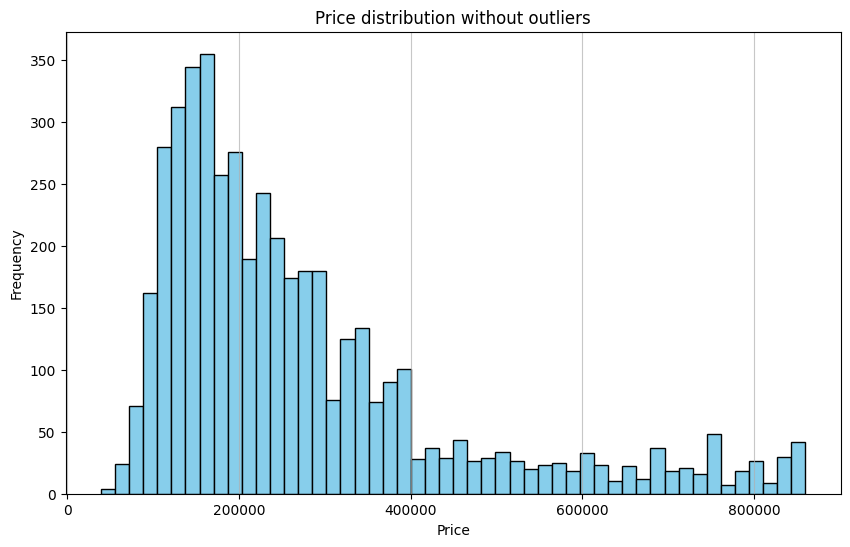

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df_histogram = pd.read_csv(HISTOGRAM_DATA, sep=',')

# Convert 'price' to numeric and remove NA values
df_histogram['price'] = pd.to_numeric(df_histogram['price'], errors='coerce')
df_cleaned = df_histogram.dropna(subset=['price'])

# Calculate IQR
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_histogram_no_outliers = df_cleaned[(df_cleaned['price'] >= lower_bound) & (df_cleaned['price'] <= upper_bound)]

# Show histogram
plt.figure(figsize=(10, 6))
df_histogram_no_outliers['price'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Price distribution without outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='x', alpha=0.7)
plt.show()

Se ha realizado una limpieza de valores extremos, ya que la visualización quedaba distorsionada y no se podía apreciar la distribución. La limpieza de outliers es algo muy común cuando se trabaja con conjuntos de datos, ya que en muchas ocasiones, estos outliers suelen provocar problemas tanto a la hora de visualizar los datos como a la hora de trabajar con ellos para entrenar algoritmos o hacer algún modelo.

Se ha seguido el método del rango intercuartílico, que es un método muy común utilizado para este propósito y que consiste en establecer unos rangos inferior y superior, 1.5 veces el IQR, de manera que todos los valores que queden fuera de dichos márgenes se eliminan de la muestra.

Como el propósito de esta práctica es de visualización se han eliminado los datos directamente. Existen alternativas como sustituir los outliers por valores medios, inferir los valores en base al resto de datos del conjunto, por ejemplo, si un piso es muy caro para la zona en la que está se puede utilizar un modelo no supervisado para inferir el valor aproximado para ese registro del conjunto de datos.

## 2. Mapa Cloroplético
### Origen y Autoría

El mapa cloroplético se originó a principios del siglo XIX, y se atribuye su primera conceptualización al geógrafo francés Charles Dupin en 1826. Este tipo de mapa se diseñó para representar variaciones de datos cuantitativos en regiones geográficas, utilizando distintos tonos o colores para ilustrar rangos de valores y facilitar la interpretación visual de patrones geoespaciales.

### Pros y Contras

- **Pros**:
  - **Visualización efectiva de datos espaciales**: Permite observar rápidamente patrones y tendencias geográficas, facilitando la interpretación de datos relacionados con la ubicación, como densidad de población o índices económicos.
  - **Comparación visual clara**: Los gradientes de color permiten comparar áreas geográficas y ver diferencias o similitudes de manera intuitiva.
  - **Flexibilidad en representación de datos**: Puede adaptarse para mostrar diferentes rangos de datos, desde porcentajes hasta datos categóricos.

- **Contras**:
  - **Percepción influida por el tamaño de las áreas**: Áreas geográficas más grandes pueden crear una impresión exagerada de importancia visual, independientemente del valor representado.
  - **Interpretación dependiente de la escala de colores**: La elección de colores y rangos puede afectar la percepción, llevando a interpretaciones erróneas si no se eligen cuidadosamente.
  - **Simplificación excesiva**: Al promediar o agrupar datos en regiones, se pierde precisión en los datos locales y variaciones internas.

### Tipos de Datos que Admite
- **Datos Continuos**: Valores que varían dentro de un rango específico, como la densidad de población o el ingreso per cápita.
- **Datos Categóricos**: También puede usarse para clasificar áreas en categorías específicas, como zonas de riesgo bajo, medio y alto, aunque esta aplicación es menos común que los datos continuos.

### Aplicaciones Típicas
- *Demografía*: Representación de densidad de población, tasas de natalidad, niveles de educación, y otros indicadores demográficos a nivel regional o nacional.
- *Economía*: Visualización de indicadores económicos como el PIB per cápita, tasa de desempleo, y distribución de ingresos en diferentes áreas geográficas.
- *Salud pública*: Mapeo de la incidencia de enfermedades, tasas de vacunación, acceso a servicios de salud en diferentes regiones.
- *Ciencias ambientales*: Representación de la calidad del aire, niveles de contaminación, disponibilidad de agua, y distribución de recursos naturales en distintas áreas.

In [17]:
import geopandas as gpd
import pandas as pd
import folium

# Load world booundaries data and density population data
shapefile_path = CHLOROPETH_DATA_MAP
world_boundaries = gpd.read_file(shapefile_path)
csv_path = CHLOROPETH_DATA_DENSITY
df_density = pd.read_csv(csv_path)

# This has been used to check column names and see what columns could be useful for this purpose.
# The same procedure has been made for density.
# for c in world.columns.to_list():
#     print(c)

# for c in df_density.columns.to_list():
#     print(c)

Vamos a utilizar las columnas NAME y CONTINENT del mapa con las fronteras de los distintos países para comparar con el mapa de densidad de población y, posteriormente, filtrar por países de Europa.

En cuanto al mapa de densidad vamos a utilizar las columnas name y Density.

Se hace un rename para juntar ambos dataframe en uno solo, de manera similar a como lo haríamos con una tabla SQL. La idea es usar un dataset unificado donde la referencia para la unión de ambos conjuntos sea el nombre del país.

Se ha modificado en el dataset original de densityPopulation.csv el nombre de República Checa (Czech Republic) por Czechia. También se ha modifica Bosnia y Herzegovina por Bosnia and Herz. Por otra parte, el país que aparece en negro es Kosovo. Se ha decidido no modificar nada relativo a Kosovo al tratarse de cuestiones políticas.

In [18]:
# Rename for merge both dataframes
world_boundaries = world_boundaries.rename(columns={'NAME': 'country'})
df_density = df_density.rename(columns={'name': 'country'})

# Filter by CONTINENT == Europe
europe = world_boundaries[world_boundaries['CONTINENT'] == 'Europe']

# Merge Europe with density using country
merged_europe = europe.merge(df_density, on='country', how='left')

# Initialize a Folium map centered on Europe
map = folium.Map(location=[54, 15], zoom_start=4)  # Centered on Europe

# Add the choropleth layer for European countries with red-blue gradient
folium.Choropleth(
    geo_data=merged_europe,      # GeoDataFrame for Europe with density data
    data=merged_europe,          # Data source for density values
    columns=['country', 'Density'],  # Columns to match: country and density
    key_on='feature.properties.country',  # Key to match GeoJSON feature name
    fill_color='YlOrRd',        # Color gradient from red (high) to blue (low)
    fill_opacity=1,
    line_opacity=1,
    legend_name='Density Population'
).add_to(map)

# Save and display
map.save(CHLOROPETH_DATA_SAVED_MAP)
map  # Display map if running in Jupyter Notebook or similar environment

## 3. Gráfico Marimekko

### Origen y Autoría

El gráfico Marimekko, también conocido como gráfico de área proporcional o "Mekko", fue desarrollado por el consultor finlandés **Reijo Ruoho** en la década de 1980. Este tipo de gráfico es utilizado principalmente para representar la distribución de variables categóricas, donde las áreas de las barras varían proporcionalmente al valor de las categorías representadas. El Marimekko se utiliza comúnmente en análisis de mercados y en la visualización de datos empresariales, ya que permite mostrar tanto las proporciones dentro de cada categoría como la comparación entre ellas.

### Pros y Contras

- **Pros**:
  - **Visualización clara de la relación entre categorías**: Permite mostrar tanto la proporción dentro de cada categoría como la comparación entre categorías de manera efectiva.
  - **Facilita la interpretación de datos complejos**: Ideal para mostrar distribuciones de datos multidimensionales en una sola vista.
  - **Accesible y fácil de entender**: Su estructura visual es relativamente fácil de leer, especialmente cuando se compara con gráficos más complejos.

- **Contras**:
  - **Puede resultar confuso con demasiadas categorías**: Si el gráfico incluye un número muy grande de categorías, la visualización puede volverse difícil de interpretar.
  - **Dificultad para mostrar exactitudes numéricas**: Aunque es eficaz para mostrar proporciones, puede ser difícil extraer valores exactos de las áreas sin herramientas adicionales.
  - **Espacio limitado**: Cuando las categorías tienen proporciones muy pequeñas, puede ser complicado mostrar todos los detalles de manera adecuada.

### Tipos de Datos que Admite
- **Datos Categóricos**: El gráfico Marimekko es especialmente útil cuando se tienen datos categóricos y se desea mostrar la proporción de cada categoría dentro de un total.
- **Datos Proporcionales**: Cada barra y su área correspondiente representan una proporción, lo que lo hace adecuado para mostrar cómo se dividen partes de un todo en diversas categorías.

### Aplicaciones Típicas
- *Análisis de Mercado*: Para visualizar la cuota de mercado de diferentes competidores dentro de una industria o región.
- *Estudios de Demografía*: Comparación de distribuciones de población entre diferentes segmentos o categorías de edad, género, etc.
- *Análisis de Ventas*: Visualización de las ventas de diferentes productos o líneas de negocio dentro de una empresa.
- *Estrategia Empresarial*: Comparación de diferentes áreas de negocio o productos, ayudando en la toma de decisiones estratégicas.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare data
file_path = MARIMEKKO_DATA
budgets_df = pd.read_excel(file_path, sheet_name='141', skiprows=5, nrows=28)
budgets_df = budgets_df.rename(columns={'Políticas': 'policy'})
budgets_df.columns = budgets_df.columns.astype(str)
budgets_df.head(5)


,policy,2014,2015,2016,2017,2018,2018-P,2019-P,2021,2022,2023
0,Justicia,1500.75404,1508.15445,1604.31179,1726.19093,1780.74441,1779.72937,1779.72937,2048.13086,2283.54940,2291.31848
1,Defensa,5654.45439,5711.68742,5734.29191,7575.59287,8400.56154,8400.56154,8400.56154,9072.01433,9790.81151,12316.82907
2,Seguridad ciudadana e Instituciones penitencia...,7880.95326,7843.12934,7903.61760,7912.33049,8418.13871,8418.08732,8418.08732,9694.41496,10148.79292,10719.20460
3,Política Exterior y de cooperación para el des...,1395.16909,1422.42613,1477.93985,1521.69850,1581.44350,1581.44350,1581.44350,1882.00770,2253.51982,2425.50604
4,Pensiones,127483.83335,131658.53137,135448.92579,139646.72308,144834.30566,144834.30566,144834.30566,163296.58073,171139.65331,190687.24615


Se van a seleccionar 4 políticas que suelen salir a debate y que, a excepción de las pensiones, que son el debate central de los últimos años, tienen un peso más similar en los presupuestos.

Además se han seleccionado los últimos 3 años para no dificultar la visualización y la comprensión de los datos, pues una de las limitaciones de las visualizaciones Marimekko es que si hay muchas categorías resulta difícil de interpretar.

In [20]:
# Selected policies and years
selected_policies = ['Sanidad', 'Defensa', 'Educación', 'Cultura']
selected_years = ['2021', '2022', '2023']

# Filter data
selected_budgets_df = budgets_df[budgets_df['policy'].isin(selected_policies)]
selected_budgets_df = selected_budgets_df[['policy'] + selected_years]

# Transform policy into an index and cast everything to numeric
selected_budgets_df = selected_budgets_df.set_index('policy')
selected_budgets_df.apply(pd.to_numeric)
selected_budgets_df

,2021,2022,2023
policy,,,
Defensa,9072.01433,9790.81151,12316.82907
Sanidad,7329.68378,6606.04994,7049.08276
Educación,4893.45613,5022.78388,5354.97335
Cultura,1148.06383,1589.33219,1803.68982


/var/folders/_1/_rnshwnd0px1m82vsfm_3cg80000gn/T/ipykernel_33374/1885233174.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  width=widths[i],
/var/folders/_1/_rnshwnd0px1m82vsfm_3cg80000gn/T/ipykernel_33374/1885233174.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_start += widths[i]


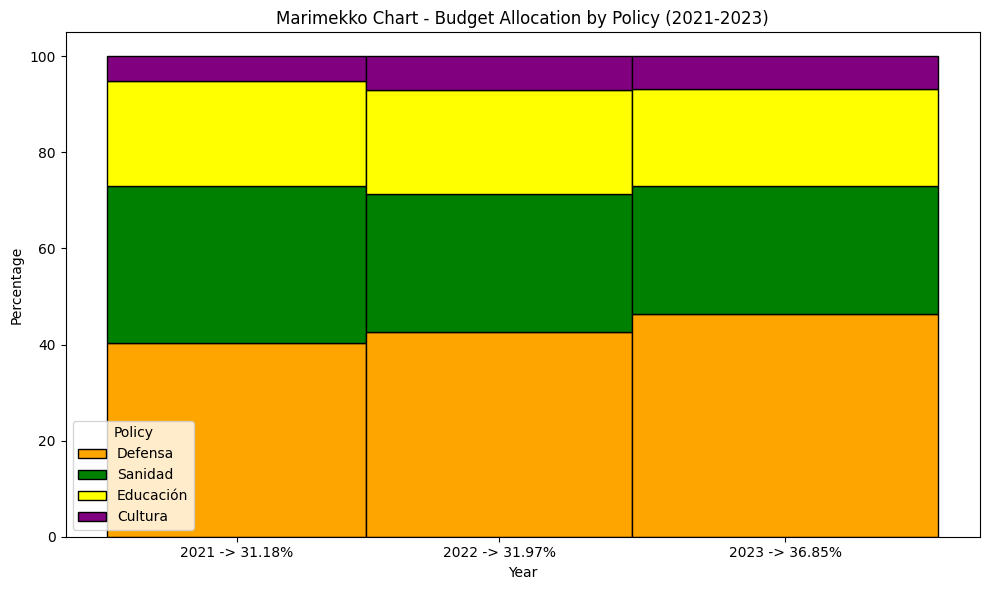

In [21]:
'''
This code is based on the one I found at:
https://curbal.com/curbal-learning-portal/90-of-100-marimekko-chart-in-matplotlib
'''
# Calculate the total for each year
totals_per_year = selected_budgets_df.sum(axis=0)

# Calculate percentages
percentages = selected_budgets_df / totals_per_year * 100

# Width calculation
widths = totals_per_year / totals_per_year.sum() * 100

# Set colors
policy_colors = {
    'Defensa': 'orange',
    'Sanidad': 'green',
    'Educación': 'yellow',
    'Cultura': 'purple'
}

# Marimekko chart
fig, ax = plt.subplots(figsize=(10, 6))
x_start = np.zeros(len(selected_budgets_df))

# Add each policy's data for each year
for i, year in enumerate(selected_budgets_df.columns):
    for j, policy in enumerate(selected_budgets_df.index):
        ax.bar(
            x_start[j],
            percentages.loc[policy, year],
            width=widths[i],
            bottom=np.sum(percentages.iloc[:j, i]), 
            label=policy if i == 0 else "",
            color=policy_colors[policy],
            align='edge', # separate boxes
            edgecolor='black'
        )

    x_start += widths[i]

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Marimekko Chart - Budget Allocation by Policy (2021-2023)')

# Add years and their corresponding percentages to the X-axis
xticks = np.cumsum(widths) - widths / 2
xtick_labels = [
    f'{year} -> {totals_per_year[year] / totals_per_year.sum() * 100:.2f}%'\
        for year in selected_budgets_df.columns
]

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)

# Add legend
ax.legend(selected_budgets_df.index, title='Policy')

# Show the chart
plt.tight_layout()
plt.show()